# **Example 1.2.1 The perceptron rule**
In this example, we provide a visual demonstration of the capablity of the Perceptron rule to converge in finite iterations if the dataset is linearly separable.

### Libraries and function definitions
Here we define some accessory functions for representation.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as sp


# Define functions to plot the results. Do not mind this part just yet.
def line(w,b,x):
    y=-b/w[1]-x*w[0]/w[1]
    y=np.reshape(y,1)
    return y
def plots(X,y,w,b,j,k):
    xmin=X.min()
    xmax=X.max()
    indexn=np.where(y==-1)
    indexp=np.where(y==1)
    plt.plot(X[0,indexp], X[1,indexp], 'k+')
    plt.plot(X[0,indexn], X[1,indexn], 'k.')
    if (j>=0):
        if (y[j]==1):
            plt.plot(X[0,j], X[1,j], 'ko')
        else:
            plt.plot(X[0,j], X[1,j], 'ko')
    if (k>=0):
        plt.plot([xmin,xmax],[line(w,b,xmin),line(w,b,xmax)],'k')
        if (j==-1):
            plt.title("Iteration "+str(k), fontsize=20)
        else:
            plt.title("Iteration "+str(k)+", sample "+str(j), fontsize=20)
    plt.axis([-3,3,-3,3])
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()


### Data generation

We get some separable data. The script generates data such that $y_i ({\bf w}^\top {\bf x}_i + b)>\eta$, where $\eta$ is given, this is, the data is separable with a margin $\eta$ over the plane. You can modify the number $N$ of data (line 1) and the value of $\eta$ (line 2). A positive value of $\eta$ produces separable data. A negative value produces nonseparable data.

Apart from this, you do not need to pay attention to this part if you are not familiar with Python.


C:\Users\aswathyr\AppData\Local\Temp\ipykernel_38368\2066941516.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[var]=np.sign(np.random.randn(1)) # Add a random label


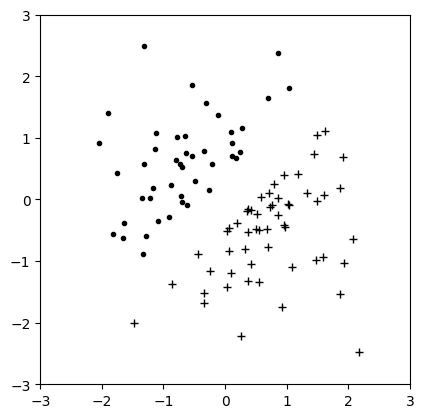

In [2]:
N=100                       # Number of data
eta=0.2                     # Here we set eta. If it is negative, the data will not be separable

w=np.array([[0.5],[-0.5]])  # Define some optimal separating hyperplane. The data
b=np.array(0)               # is generated at bot sides of this plane with y(wx + b) > nu
X=np.zeros((2,N))           # Empty variables for the data and the labels
y=np.ones((N))

for var in range(N):
    y_=-float('inf')        # We initialize the clasification result to -infinity so the loop below starts.
    while (y_*y[var])<eta:  # We discard the data that the hyperplane cannot classify with y(wx + b) > eta
        x=np.random.randn(2,1) # Generate a random vector of dimension 2
        y_=w.T@x+b             # Get the classification result
        y[var]=np.sign(np.random.randn(1)) # Add a random label
    X[:,var]=x.T            # Store the sample if it has been properly classified

plots(X,y,w,b,-1,-1) #Plot the result (and save it)

### Perceptron update rule

After initializing the classifier parameters ${\bf w}$ and $b$, we classify all training data one at a time and update the classifier parameters if a misclassification is found. We repeat the process until all the data is properly classified.

The updated separating lines are plotted and at the end the upper bound of the number of iterations is computed. Note that the upper bound is very conservative. Actually it is only useful because it proves that the algorithm converges in a finite number of iterations if the data is linearly separable.

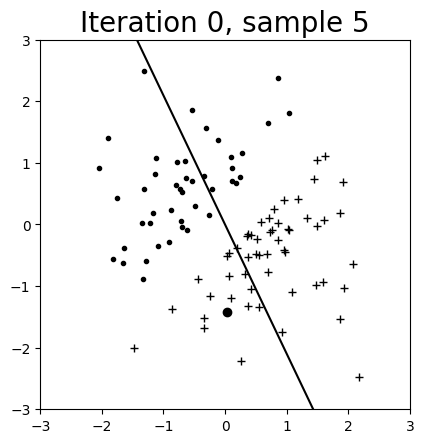

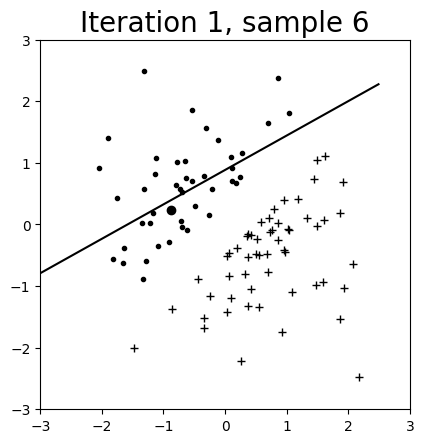

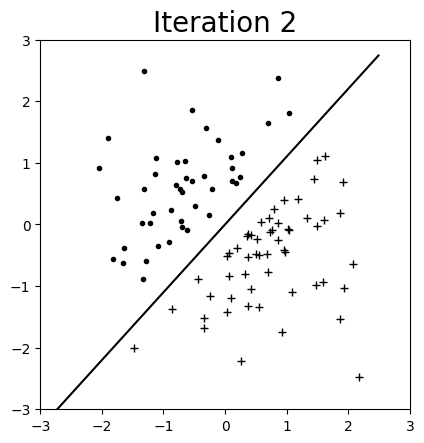

Bound: 189.0


In [3]:
w = np.random.rand(2,1) # Initialize the values of the classifier parameters.
b = np.array(0)
k = 0                   # Initialize the iteration counter.
error_found = True      # Error detected flag, set at true so the loop below starts
max_iter = 20
while (error_found):    # Do it until no errors found across the dataset X or a max of 100 iterations
    error_found = False                   # Initialize the error detected flag to false
    for j in range(N):                    # For all samples in the dataset
        x = np.reshape(X[:,j],(2,1))        # Get sample j from the dataset
        y_= np.sign(w.T@x + b)              # Classify it
        if (y_ != y[j] and k < max_iter):   # If there is an error (misclassification)
            plots(X,y,w,b,j,k)                # Plot the data and classification boundary
            k = k + 1                         # Update the iteration counter
            w = w + x * y[j]                  # Update the classifier parameters
            b = b + y[j]
            error_found = True                # Put the error detected flag to true

# Plot the final result and compute the bound on the number of iterations
plots(X,y,w,b,-1,k)
R = np.max(sp.distance_matrix(X.T, X.T, p = 2, threshold = 1000000));
print("Bound: " + str(np.round((R**2 + 1) / eta)))
